# ❓ <font color='green'> <u> PROBLEM STATEMENT (Forest_Fires) </u>

## 🔵 <font color='blue'> classify the Size_Categories using SVM

### <font color='candy'>➡Data Description:
* **month** -- month of the year: 'jan' to 'dec'
* **day** -- day of the week: 'mon' to 'sun'
* **FFMC** -- FFMC index from the FWI system: 18.7 to 96.20
* **DMC** -- DMC index from the FWI system: 1.1 to 291.3
* **DC** -- DC index from the FWI system: 7.9 to 860.6
* **ISI** -- ISI index from the FWI system: 0.0 to 56.10
* **temp** -- temperature in Celsius degrees: 2.2 to 33.30
* **RH** -- relative humidity in %: 15.0 to 100
* **wind** -- wind speed in km/h: 0.40 to 9.40
* **rain** -- outside rain in mm/m2 : 0.0 to 6.4
* **area** -- area of forest 
* **Size_Category** -- the burned area of the forest ( Small , Large) 

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> Support Vector Machine (SVM)</u></font> algorithm is a <u>supervised machine learning</u> algorithm used in machine learning to solve classification, regression, and outlier detection problems. SVMs are particularly good at solving binary classification problems, which require classifying the elements of a data set into two groups.
    
+ ### SVMs are effective in high dimensional spaces and in cases where the number of dimensions is greater than the number of samples. They are also commonly employed in classification tasks because they are particularly efficient in high-dimensional fields.
    
+ ### SVM algorithms are not suitable for large data sets.

+ ### In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. 
    
+ ###  SVM aims to find the hyperplane that best separates data points of different classes in a high-dimensional space. 

+ ### The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin, providing a robust separation between classes.
    
+ ### C parameter: SVM has a regularization parameter (C) that balances the trade-off between achieving a smooth decision boundary and classifying the training points correctly.
    
+ ### Once the SVM is trained, the decision function classifies new data points by determining on which side of the hyperplane they fall.

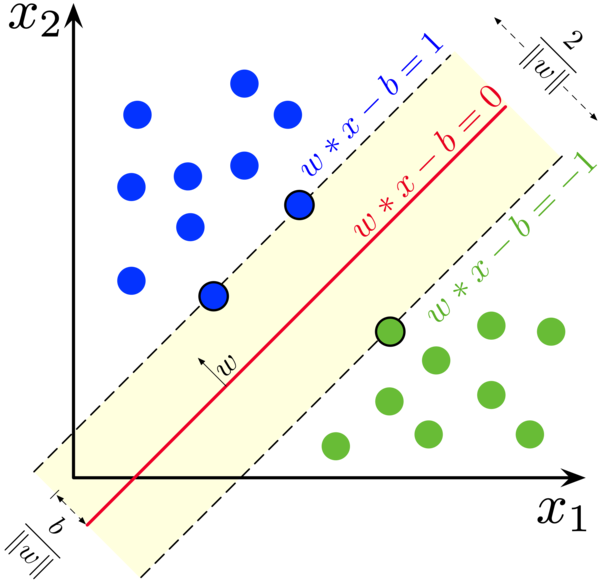

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Datasets_Assignments/main/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [2]:
df.shape

(517, 31)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

* ##### <font color ='green'> <u>Descriptive statistics</u>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
# Checking for Duplicate Records:
df.duplicated().sum()

8

In [7]:
# Get all duplicated records:
df[df.duplicated(keep = False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
# Drop Duplicated Record:
df.drop_duplicates(inplace= True)
df.duplicated().sum()
df.shape

(509, 31)

> * #### There are 517 records and 31 Variables.
> * #### All variables are of proper data type.
> * #### "size_category" is target column.
> * #### All variables are in provided range.
> * #### There is no null value observed.
> * #### There was 8 duplicated record present, which are removed.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

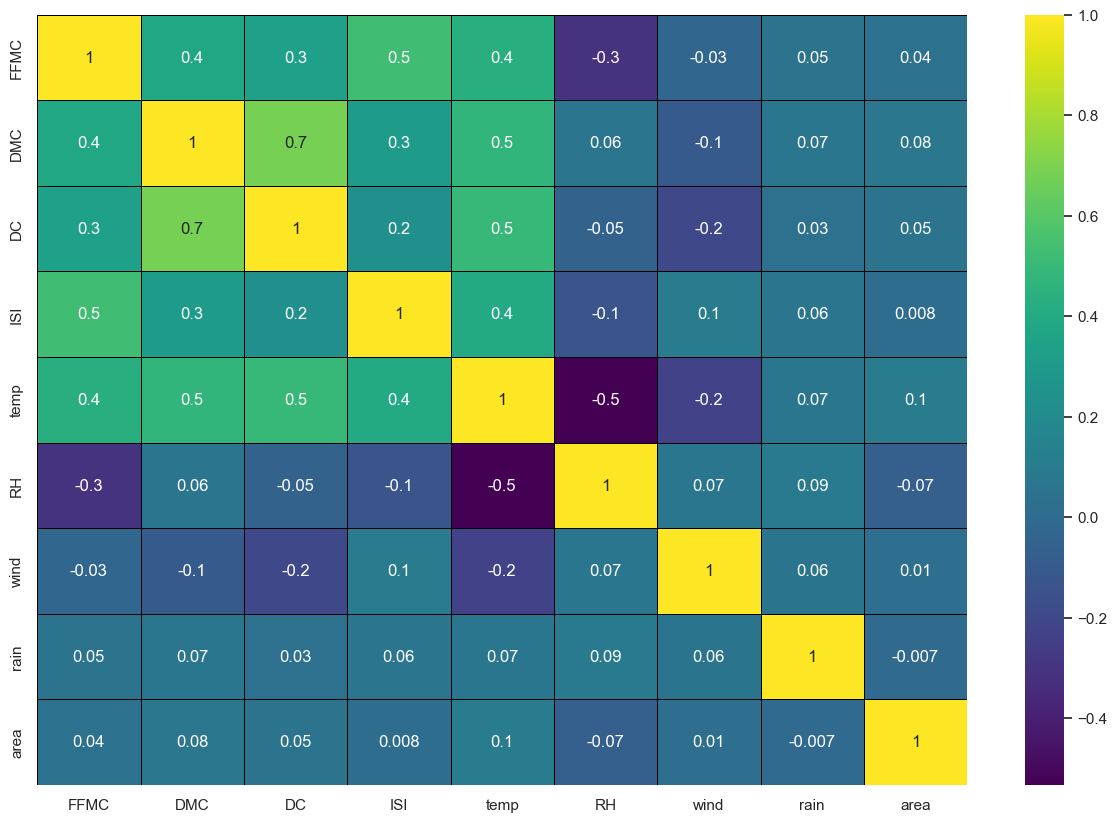

In [9]:
# Correation between Numerical variables:
Num_var = df.iloc[:,2:11]
plt.figure(figsize = (15,10))
sns.heatmap(Num_var.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black')

<Axes: ylabel='size_category'>

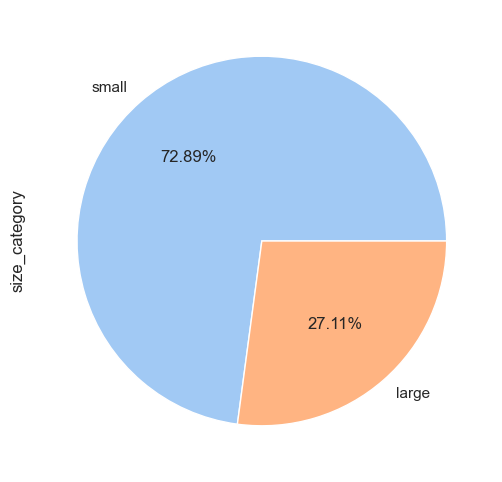

In [10]:
# Plottig Target Variable:
plt.figure(figsize = (8,6))
df['size_category'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

<Axes: >

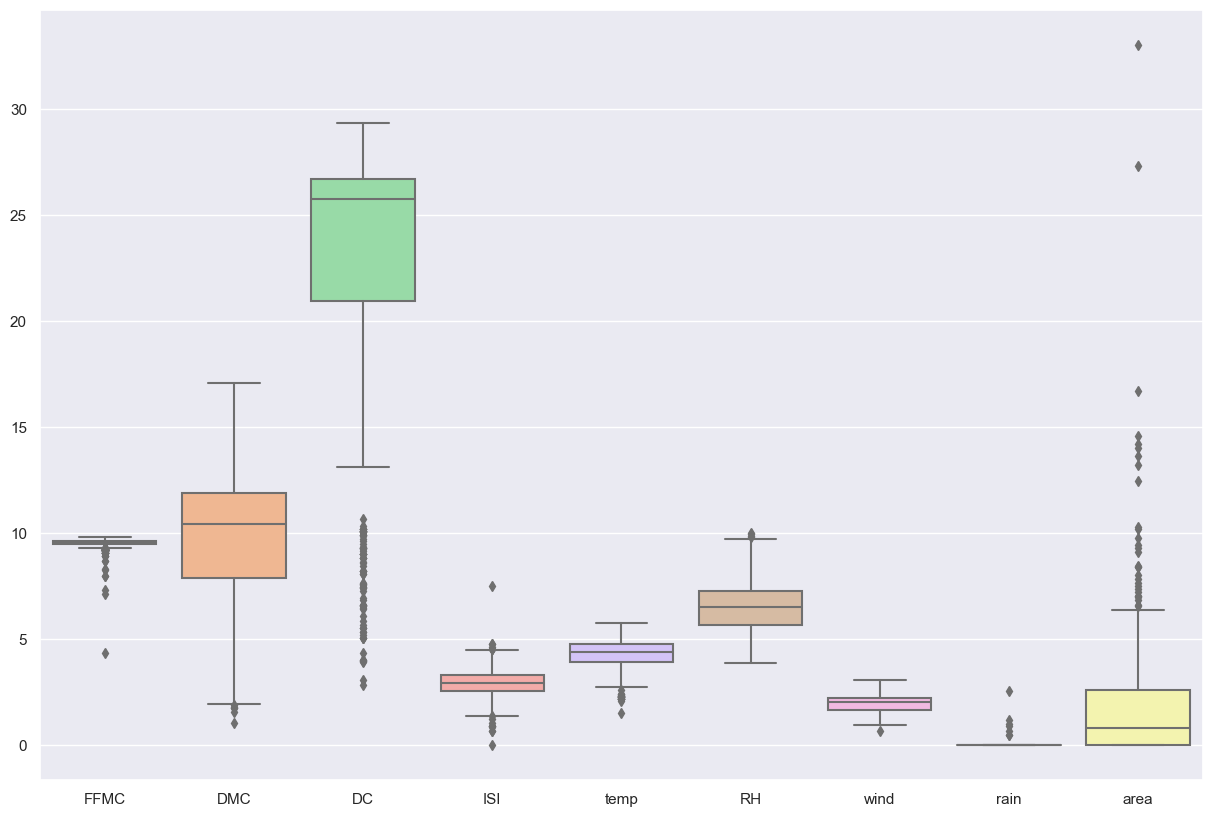

In [11]:
# Boxplot for Numerical Variables:
plt.figure(figsize =(15,10))
sns.boxplot(np.sqrt(Num_var))

<Axes: xlabel='month', ylabel='count'>

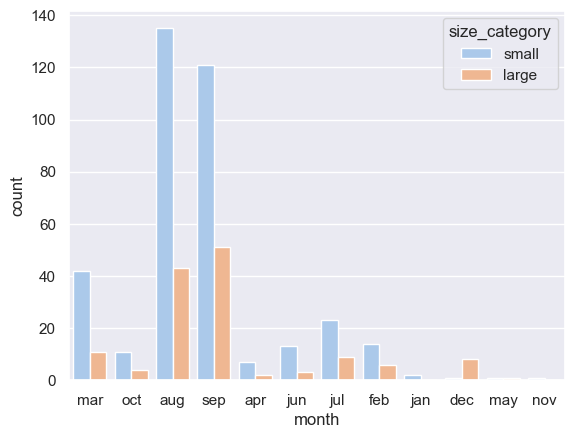

In [12]:
sns.countplot(x = df['month'], hue= df['size_category'])

<Axes: xlabel='temp', ylabel='DMC'>

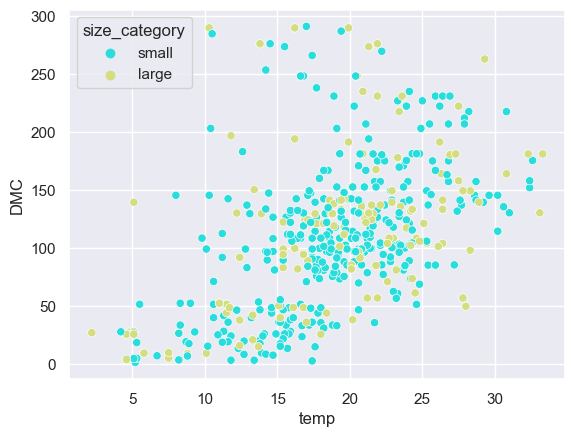

In [13]:
# Visualisation of classes:
sns.scatterplot(x = df['temp'], y = df['DMC'], hue = df['size_category'], palette= 'rainbow')

> * #### Variables "DC" and "DMC" are 70 % correlated.
> * #### Target Variable "size_category" have two categories large(27%) and small(73%) size of burned area of the forest. Given data is biased.
> * #### Many Variables have outliers but we don't remove them cause they may be important for our analysis.
> * #### Forest fires have high frequency in month of august and september.
> * #### In scatter plot we observe the overlapping of two classes.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Encoding:

In [14]:
# Encoding Target Variable using Lable Encoding:

In [15]:
le = LabelEncoder()
df['size_category'] = le.fit_transform(df['size_category'])

In [16]:
x = df.drop(columns = {'month','day','size_category'})
y = df['size_category']

### <font color = "green">➡ Standardisation:

In [17]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

### <font color = "green">➡ Train Test Split 

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [19]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (381, 28)
Shape of x_test:  (128, 28)
Shape of y_train:  (381,)
Shape of y_test (128,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [20]:
svm = SVC()
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [21]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.26      0.40        39
           1       0.75      0.99      0.85        89

    accuracy                           0.77       128
   macro avg       0.83      0.62      0.63       128
weighted avg       0.80      0.77      0.72       128



In [22]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 76.56%


In [23]:
print(f'Tranning Score: {svm.score(xtrain,ytrain)}')
print(f'Testing Score:{svm.score(xtest,ytest)}')

Tranning Score: 0.7716535433070866
Testing Score:0.765625


> * #### With default value of Regularization parameter (C) = 1.0, kernel ='rbf', degree = 3 we get 76.56% of accuracy, let's see accuracy after hyperparameter tunning.     
> * #### The strength of the regularization is inversely proportional to C. Must be strictly positive.

___

* ### <font color = 'blue'> <u> HYPERPARAMETER TUNNING </u>

In [24]:
params = {
    'C' : [0.01,0.1,1,10,12],
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'gamma' : [0.1,1,5,10,12]
}

In [25]:
grid = GridSearchCV(SVC(), param_grid = params, verbose = 1)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 12],
                         'gamma': [0.1, 1, 5, 10, 12],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=1)

In [26]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [27]:
# Model using new parameters:
svm = SVC(C = 10, kernel= 'linear', gamma= 0.1)
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [28]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.95      0.99      0.97        89

    accuracy                           0.95       128
   macro avg       0.96      0.93      0.94       128
weighted avg       0.95      0.95      0.95       128



In [29]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 95.31%


In [30]:
print(f'Tranning Score: {svm.score(xtrain,ytrain)}')
print(f'Testing Score:{svm.score(xtest,ytest)}')

Tranning Score: 0.984251968503937
Testing Score:0.953125


* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### After Hyperparameter tunning both Training (98%) and Testing (95%) accuracies we recieved are good. Also percision, recall, f1-score for both the classes are good.
> * #### This concludes that Support Vector Machine(SVM) distingwish classes efficiently on non-linear data also.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___